Primeiramente, é importado as bibliotecas a serem utilizadas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Questão 1 - Leia os dados com erro (iris-with-errors.csv), faça a limpeza e remova as duas últimas colunas. Quantas linhas e colunas sobraram nos dados?

a.
14,10


b.
14,4


c.
12,3


d.
14,3


e.
12,2

In [2]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))

#Transforma "?" em "NaN", remove as linhas com "NaN", e removes as colunas com dados irrelevantes
data = data.drop_duplicates() #'dataframe.drop_duplicates()' Remove linhas iguais
data = data.replace("?", np.nan) #dataframe.replace(a, b) Substitui todos os elementos 'a' do dataframe por 'b'
data = data.dropna() #dataframe.dropna Remove todas as linhas com elementos NaN.
data = data.drop(data.columns[[-1, -2]], axis=1) #dataframe.drop(c) remove as linhas ou colunas de indice c ou dos elementos de c, se c for uma lista. Axis indica se será linhas(axis = 0) ou colunas a serem removidas(axis = 1)

l, c = pd.DataFrame(data).shape #dataframe.shape retorna uma lista com o número de linhas e colunas como elementos.

data.head(25)
print(f'\nHá {l} linhas e {c} colunas')

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris-with-errors.csv'

Como podemos ver com a saída do bloco de código acima, após a limpeza dos dados há 14 linhas e 3 colunas

Questão 2 - Leia os dados com erro novamente e insira a media de cada atributo onde for encontrada
NaN e '?'. Quais os valores das medianas obtidas para os atributos?

a.
[6.01 2.45 3.4 1.2 ]


b.
[5.05 3.45 1.4 0.2 ]



c.
[5.15 5.45 3.4 4.2 ]


d.
[5.12 4.45 12.4 2.2 ]


e.
[4.15 3.45 2.4 1.2 ]

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))

data = data.replace('?', np.nan)
np_data = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
averages = np.nanmean(np_data, axis = 0)

#substitui os NaN pela respectiva média da coluna
for i in np.arange(0, np_data.shape[0]):
    for j in np.arange(0, np_data.shape[1]):
        if(np.isnan(np_data[i,j]) == True):
            np_data[i,j] = averages[j]

#Calculo das medianas
medians = [float(np.median(np_data[:, i])) for i in range(np_data.shape[1])]

print(medians)

[5.0227272727272725, 3.4375, 1.4, 0.2]


Após substituir a média das colunas nos respectivos valores "NaN" e "?", temos que as medianas são, aproximadamente, respectivamente: 5,05; 3,45; 1,4; e 0,2.

Questão 3 - Monte um boxplot para cada variável dos dados da Iris. Quais atributos apresentam outliers?

a.
sepal_width e petal_length


b.
petal_length


c.
sepal_length e sepal_width

d.
Todos.


e.
sepal_width

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

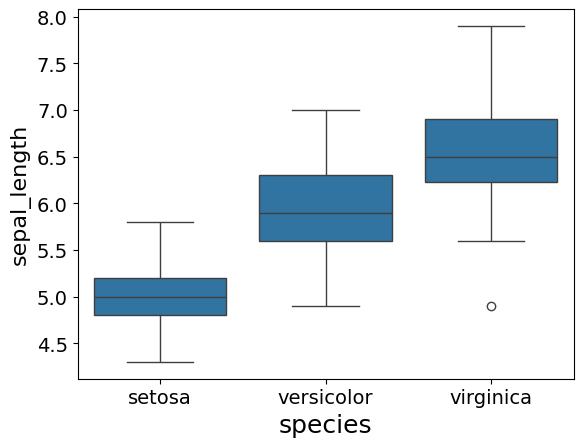

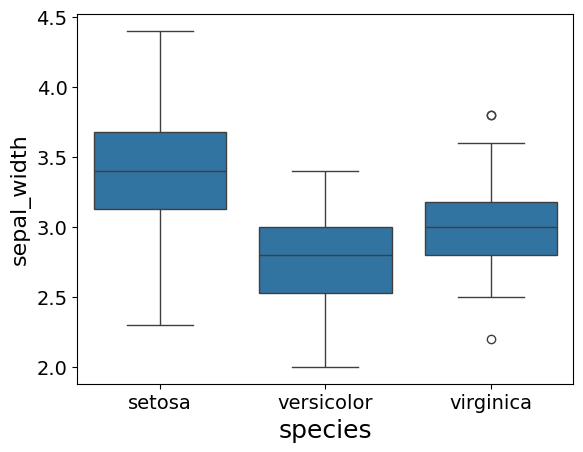

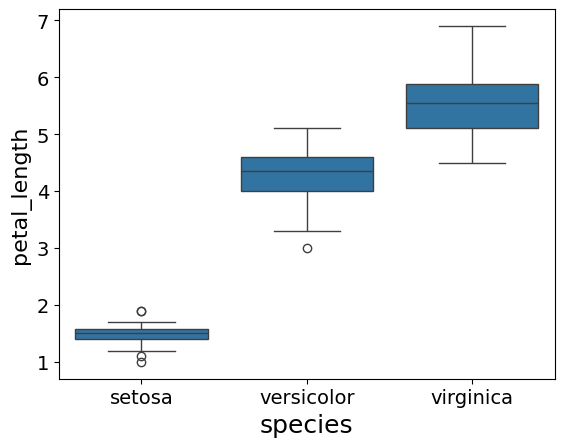

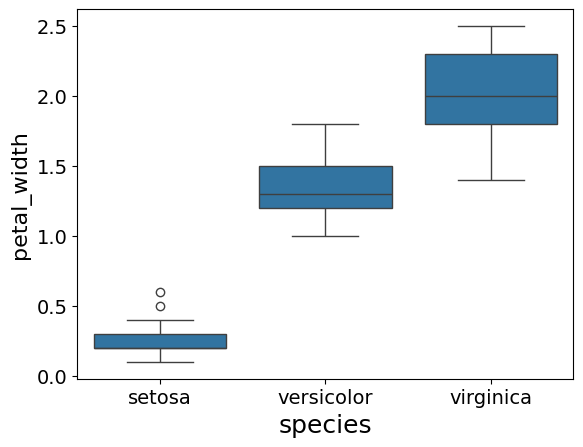

In [ ]:
import seaborn as sns

data = pd.read_csv('/content/iris.csv', header=(0))
print(data.head(25))
np_data = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)

atributos = list(data.columns[:-1])
print(f"Atributos: {atributos}")

#Constroi o boxplot
for each in atributos:
  sns.boxplot(x="species", y=f'{each}', data=data)
  plt.xlabel('species', fontsize=18)
  plt.ylabel(f'{each}', fontsize=16)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show(True)
  print('\n')



Todos atributos apresentam outliners

Questão 4 - Considere a base de dados Advertising.csv. Calcule a correlação entre as variáveis. Quais são as variáveis mais correlacionadas?

a.
TV e newspaper


b.
radio e newspaper


c.
TV e sales


d.
radio e sales


e.
TV e radio

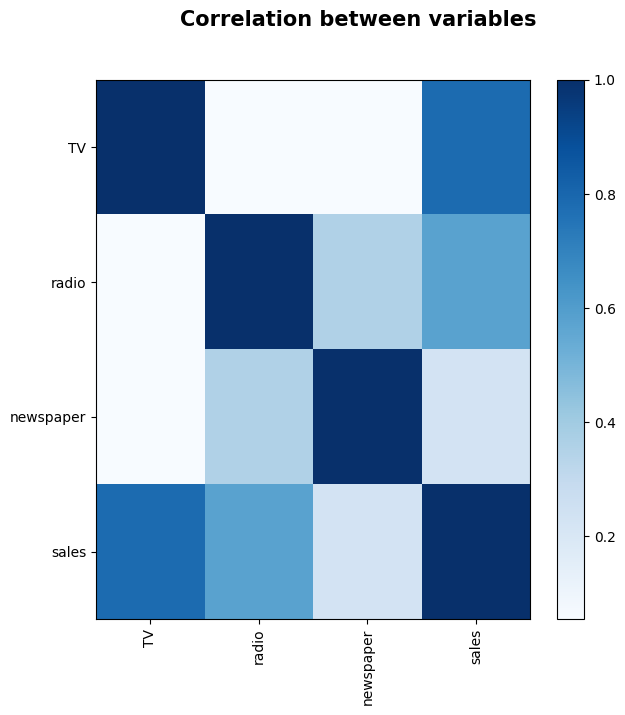

In [ ]:
data = pd.read_csv('/content/Advertising.csv', header=(0))

#Pega apenas as colunas com dados relevantes
relevant_data = data.iloc[:, 1:]
#Calcula a correlação
corr = relevant_data.corr()

#Desenha a tabela de correlação
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()


Como podemos ver, mesmo que pouca, a maior correlação é entre "TV" e "sales".